In [1]:
# Import required libraries
%matplotlib inline
from ultralytics import YOLO
import torch
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.lite as tflite

In [ ]:
#Install the required libraries
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121Note: you may need to restart the kernel to use updated packages.

     ---------------------------------------- 0.0/4.1 MB ? eta -:--:--
     ---------------------------------------- 4.1/4.1 MB 27.5 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
     ---------------------------------------- 0.0/4.1 MB ? eta -:--:--
     ---------------------------------------- 4.1/4.1 MB 31.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/4.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/4.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/4.1 MB ? eta -:--:--
     -- ------------------------------------- 0.3/4.1 MB ? eta -:--:--
     ----- ---------------------------------- 0.5/4.1 MB 1.4 MB/s eta 0:00:03
     --------------- ------------------------ 1.6/4.1 MB 3.4 MB/s 

  You can safely remove it manually.


In [2]:
# Check if the GPU is available
import torch
print(torch.cuda.is_available()) 
print(torch.cuda.device_count()) 
print(torch.cuda.get_device_name(0)) 

True
1
NVIDIA GeForce RTX 4050 Laptop GPU


In [3]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2025 NVIDIA Corporation
Built on Wed_Jan_15_19:38:46_Pacific_Standard_Time_2025
Cuda compilation tools, release 12.8, V12.8.61
Build cuda_12.8.r12.8/compiler.35404655_0


In [ ]:
# Iteration 2 - Train the yolo model on custom dataset
model = YOLO("yolov8n.pt")
model.train(data="C:/Users/Divay Nagpal/Documents/NorthwesternMaterial/MS462/Final Project/YoloTraining/data.yaml", epochs=40, batch=16, imgsz=640, lr0=0.0001, device=0)


New https://pypi.org/project/ultralytics/8.3.88 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.75  Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=C:/Users/Divay Nagpal/Documents/NorthwesternMaterial/MS462/Final Project/YoloTraining/data.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, 

train: Scanning C:\Users\Divay Nagpal\Documents\NorthwesternMaterial\MS462\Final Project\Dataset\train\labels.cache... 5728 images, 3 backgrounds, 1 corrupt: 100%|██████████| 5728/5728 [00:00<?, ?it/s]

train: WARNING  C:\Users\Divay Nagpal\Documents\NorthwesternMaterial\MS462\Final Project\Dataset\train\images\Starbucks.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     775.65      770.71      1520.7        1525]



val: Scanning C:\Users\Divay Nagpal\Documents\NorthwesternMaterial\MS462\Final Project\Dataset\valid\labels.cache... 250 images, 0 backgrounds, 1 corrupt: 100%|██████████| 250/250 [00:00<?, ?it/s]

val: WARNING  C:\Users\Divay Nagpal\Documents\NorthwesternMaterial\MS462\Final Project\Dataset\valid\images\Starbucks.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     775.65      770.71      1520.7        1525]


Plotting labels to runs\detect\train3\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train3
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      2.19G      1.288      2.095      1.039         45        640: 100%|██████████| 358/358 [02:04<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.51it/s]

                   all        249        521      0.533      0.541      0.569      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      2.15G      1.332      1.266      1.036         58        640: 100%|██████████| 358/358 [01:50<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.00it/s]

                   all        249        521      0.777      0.177      0.632      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      2.09G      1.301      1.073      1.032         49        640: 100%|██████████| 358/358 [01:42<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]

                   all        249        521      0.786       0.17      0.575      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      2.13G      1.287      1.014      1.022         32        640: 100%|██████████| 358/358 [01:45<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]

                   all        249        521      0.633      0.718      0.693      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      2.15G       1.23     0.9443      1.004         50        640: 100%|██████████| 358/358 [01:41<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]

                   all        249        521      0.746      0.693      0.709      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      2.12G      1.214     0.9188      0.999         40        640: 100%|██████████| 358/358 [01:43<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.07it/s]

                   all        249        521      0.851      0.691      0.744      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40      2.12G      1.164     0.8608     0.9801         45        640: 100%|██████████| 358/358 [01:42<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.15it/s]

                   all        249        521      0.756       0.68      0.744      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40      2.13G       1.15     0.8243     0.9718         47        640: 100%|██████████| 358/358 [01:43<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  2.00it/s]

                   all        249        521       0.79      0.715      0.745      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      2.12G       1.12     0.8124     0.9697         51        640: 100%|██████████| 358/358 [01:43<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.08it/s]

                   all        249        521      0.818      0.711      0.768      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40       2.1G      1.106     0.7893     0.9595         62        640: 100%|██████████| 358/358 [01:42<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.98it/s]

                   all        249        521      0.814      0.728      0.762      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      2.13G      1.089      0.774     0.9582         44        640: 100%|██████████| 358/358 [01:43<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.10it/s]

                   all        249        521      0.839       0.75      0.774       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      2.13G      1.091     0.7629     0.9553         36        640: 100%|██████████| 358/358 [01:42<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.99it/s]

                   all        249        521      0.804      0.741      0.781      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      2.14G      1.065     0.7384     0.9456         70        640: 100%|██████████| 358/358 [01:44<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]

                   all        249        521      0.817      0.745      0.785       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      2.13G      1.052     0.7315      0.951         41        640: 100%|██████████| 358/358 [01:42<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.11it/s]

                   all        249        521      0.826      0.746      0.783      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      2.15G      1.052     0.7261     0.9471         38        640: 100%|██████████| 358/358 [01:44<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.00it/s]

                   all        249        521      0.765      0.746      0.789      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      2.14G      1.044       0.71     0.9361         36        640: 100%|██████████| 358/358 [01:42<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.13it/s]

                   all        249        521      0.857       0.74      0.801      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40      2.15G      1.026     0.7003     0.9352         51        640: 100%|██████████| 358/358 [01:43<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.16it/s]

                   all        249        521      0.841      0.746      0.802      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      2.15G      1.015      0.685     0.9372         45        640: 100%|██████████| 358/358 [01:42<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.12it/s]

                   all        249        521      0.819      0.769      0.813      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      2.13G      1.012      0.684     0.9336         35        640: 100%|██████████| 358/358 [01:43<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]

                   all        249        521      0.868      0.744      0.805      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      2.15G      0.993     0.6644     0.9253         34        640: 100%|██████████| 358/358 [01:42<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.16it/s]

                   all        249        521       0.83      0.774      0.812      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40      2.15G      1.006     0.6626     0.9287         63        640: 100%|██████████| 358/358 [01:43<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]

                   all        249        521      0.838      0.765      0.807      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40      2.13G     0.9723     0.6448     0.9204         36        640: 100%|██████████| 358/358 [01:43<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.06it/s]

                   all        249        521      0.858      0.766      0.812      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      2.15G     0.9739     0.6325     0.9202         35        640: 100%|██████████| 358/358 [01:41<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]

                   all        249        521      0.829      0.778      0.814      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40       2.1G     0.9635      0.636     0.9184         58        640: 100%|██████████| 358/358 [01:43<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.11it/s]

                   all        249        521       0.83       0.79      0.819      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40      2.12G     0.9538     0.6275     0.9182         53        640: 100%|██████████| 358/358 [01:42<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.18it/s]

                   all        249        521      0.835      0.777      0.819      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40      2.15G     0.9477     0.6055     0.9154         53        640: 100%|██████████| 358/358 [01:44<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.07it/s]

                   all        249        521      0.871      0.775      0.823      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40      2.08G     0.9398     0.6111     0.9127         58        640: 100%|██████████| 358/358 [01:41<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.09it/s]

                   all        249        521      0.874      0.765       0.82      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40      2.16G     0.9321     0.5958     0.9076         40        640: 100%|██████████| 358/358 [00:49<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.29it/s]

                   all        249        521      0.857      0.773      0.817       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40      2.12G     0.9291     0.5921      0.907         42        640: 100%|██████████| 358/358 [00:49<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.64it/s]

                   all        249        521      0.841      0.792      0.832      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      2.15G     0.9224     0.5793     0.9057         39        640: 100%|██████████| 358/358 [00:49<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.63it/s]

                   all        249        521       0.86      0.782      0.829      0.668


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40      2.12G     0.9101     0.5606     0.8875         36        640: 100%|██████████| 358/358 [00:50<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.51it/s]

                   all        249        521      0.879      0.774      0.831      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40      2.15G     0.8976     0.5467     0.8872         26        640: 100%|██████████| 358/358 [00:49<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.63it/s]

                   all        249        521      0.846      0.796      0.829      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40      2.14G     0.8824     0.5348     0.8805         32        640: 100%|██████████| 358/358 [00:48<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.71it/s]

                   all        249        521       0.85       0.79      0.831      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40      2.12G     0.8758     0.5264     0.8808         30        640: 100%|██████████| 358/358 [00:48<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.68it/s]

                   all        249        521      0.855      0.795      0.836      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40      2.11G     0.8591     0.5084     0.8714         31        640: 100%|██████████| 358/358 [00:49<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.90it/s]

                   all        249        521      0.864      0.792      0.833      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40      2.11G     0.8543     0.5036     0.8765         43        640: 100%|██████████| 358/358 [00:48<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.70it/s]

                   all        249        521      0.873      0.785      0.835      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40      2.07G     0.8416     0.4926     0.8678         22        640: 100%|██████████| 358/358 [00:48<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.73it/s]

                   all        249        521      0.877      0.788      0.834      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40      2.12G     0.8419     0.4922     0.8686         27        640: 100%|██████████| 358/358 [00:48<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.71it/s]

                   all        249        521      0.917        0.8      0.839      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40      2.14G     0.8305     0.4809     0.8659         25        640: 100%|██████████| 358/358 [00:49<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.58it/s]

                   all        249        521      0.903      0.798      0.834      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40      2.12G     0.8255     0.4792     0.8603         27        640: 100%|██████████| 358/358 [00:48<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.83it/s]

                   all        249        521       0.92      0.805       0.84      0.693



40 epochs completed in 1.018 hours.
Optimizer stripped from runs\detect\train3\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train3\weights\best.pt, 6.2MB

Validating runs\detect\train3\weights\best.pt...
Ultralytics 8.3.75  Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.96it/s]


                   all        249        521       0.92      0.805       0.84      0.694
                  NIKE        244        516       0.84       0.61      0.684      0.435
             Starbucks          5          5          1          1      0.995      0.952
Speed: 0.5ms preprocess, 1.6ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs\detect\train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001D2332EBD90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0

In [7]:
!nvidia-smi

Sun Mar  2 17:33:17 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 571.96                 Driver Version: 571.96         CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   66C    P4             11W /   80W |     353MiB /   6141MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [6]:
# Export the tflite model to be deployed on edge devices
model.export(format="tflite")

Ultralytics 8.3.75  Python-3.11.11 torch-2.5.1+cu121 CPU (13th Gen Intel Core(TM) i7-13700HX)


Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'runs\detect\train3\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (5.9 MB)

TensorFlow SavedModel: starting export with tensorflow 2.18.0...


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.48...
ONNX: export success  1.0s, saved as 'runs\detect\train3\weights\best.onnx' (11.8 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.26.3...
TensorFlow SavedModel: export success  23.3s, saved as 'runs\detect\train3\weights\best_saved_model' (30.1 MB)

TensorFlow Lite: starting export with tensorflow 2.18.0...
TensorFlow Lite: export success  0.0s, saved as 'runs\detect\train3\weights\best_saved_model\best_float32.tflite' (11.7 MB)

Export complete (23.7s)
Results saved to C:\Users\Divay Nagpal\Documents\NorthwesternMaterial\MS462\Final Project\YoloTraining\runs\detect\train3\weights
Predict:      

'runs\\detect\\train3\\weights\\best_saved_model\\best_float32.tflite'

In [ ]:

model = YOLO("C:/Users/Divay Nagpal/Documents/NorthwesternMaterial/MS462/Final Project/YoloTraining/runs/detect/train3/weights/best.pt")

# Load an image for prediction
image_path = "C:/Users/Divay Nagpal/Documents/NorthwesternMaterial/MS462/Final Project/FinalSubmission/KakaoTalk_20240404_104751305_29_jpg.rf.99f1fdbc0d0d656d1236332a55f3b276.jpg"

# Perform inference
results = model.predict(image_path, conf=0.25)  # Set confidence threshold
print(results)
# Display the results
for result in results:
    boxes = result.boxes.xyxy  # Bounding box coordinates
    scores = result.boxes.conf.tolist()  # Confidence scores
    classes = result.boxes.cls.tolist()  # Class labels
    
    # Print detected objects
    for cls, conf, box in zip(classes, scores, boxes):
        print(f"Detected Class: {int(cls)}, Confidence: {conf}, Bounding Box: {box.tolist()}")

    # Show image with detections
    result.show()  

# Validate the model on the test set
metrics = model.val(data="C:/Users/Divay Nagpal/Documents/NorthwesternMaterial/MS462/Final Project/YoloTraining/data.yaml", split="test", augment=False)


image 1/1 C:\Users\Divay Nagpal\Documents\NorthwesternMaterial\MS462\Final Project\FinalSubmission\KakaoTalk_20240404_104751305_29_jpg.rf.99f1fdbc0d0d656d1236332a55f3b276.jpg: 640x640 1 Starbucks, 7.2ms
Speed: 5.9ms preprocess, 7.2ms inference, 170.2ms postprocess per image at shape (1, 3, 640, 640)
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'NIKE', 1: 'Starbucks'}
obb: None
orig_img: array([[[195, 197, 197],
        [195, 197, 197],
        [195, 197, 197],
        ...,
        [200, 202, 202],
        [200, 202, 202],
        [200, 202, 202]],

       [[195, 197, 197],
        [195, 197, 197],
        [195, 197, 197],
        ...,
        [199, 201, 201],
        [199, 201, 201],
        [199, 201, 201]],

       [[195, 197, 197],
        [195, 197, 197],
        [195, 197, 197],
        ...,
        [198, 200, 200],
        [198, 200, 200],
        [198, 200, 200]],

       ...,


val: Scanning C:\Users\Divay Nagpal\Documents\NorthwesternMaterial\MS462\Final Project\Dataset\test\labels.cache... 19 images, 0 backgrounds, 1 corrupt: 100%|██████████| 19/19 [00:00<?, ?it/s]

val: WARNING  C:\Users\Divay Nagpal\Documents\NorthwesternMaterial\MS462\Final Project\Dataset\test\images\Starbucks.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     775.65      770.71      1520.7        1525]



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.97s/it]


                   all         18         25      0.873      0.808      0.813      0.623
                  NIKE         12         19      0.745      0.617      0.631      0.316
             Starbucks          6          6          1          1      0.995      0.929
Speed: 4.7ms preprocess, 26.4ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs\detect\val12


Precision shape: [    0.74529           1]
Recall shape: [     0.6167           1]
Predicted class indices: [0, 1]
['NIKE', 'Starbucks']
classes: ['NIKE', 'Starbucks']


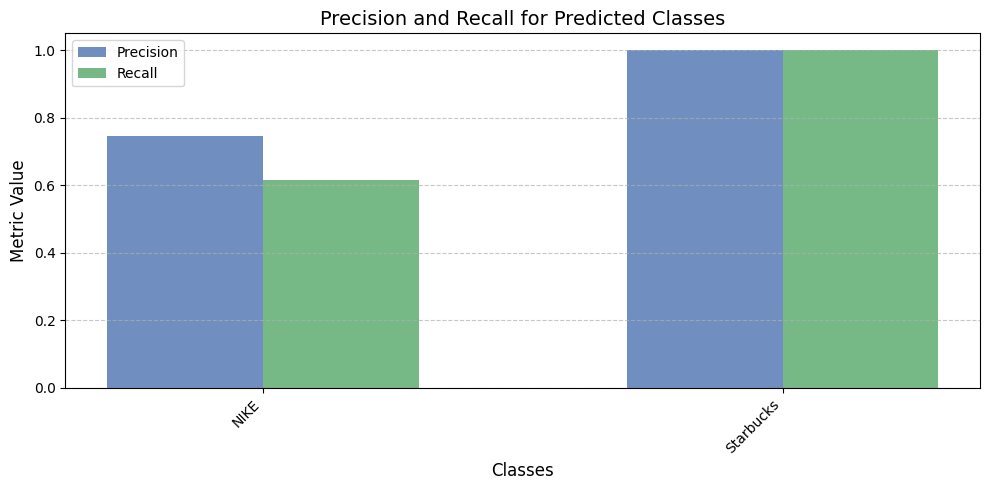

In [12]:
precision = np.array(metrics.box.p.tolist()) if isinstance(metrics.box.p, np.ndarray) else np.array([])
recall = np.array(metrics.box.r.tolist()) if isinstance(metrics.box.r, np.ndarray) else np.array([])

# Debugging prints
print("Precision shape:", precision)
print("Recall shape:", recall)

# Indices of predicted classes
predicted_indices = metrics.ap_class_index.tolist()  
print("Predicted class indices:", predicted_indices)


# Extract class names
class_names = list(metrics.names.values())  # Full class list
print(class_names)

filtered_class_names = [class_names[i] for i in predicted_indices]
print("classes:",filtered_class_names)
#filtered_precision = [precision[i] for i in predicted_indices]
#filtered_recall = [recall[i] for i in predicted_indices]

# Define x-axis indices
x = np.arange(len(filtered_class_names))
width = 0.3  

# Create figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot bars
ax.bar(x - width/2, precision, width, label='Precision', color='b', alpha=0.8)
ax.bar(x + width/2, recall, width, label='Recall', color='g', alpha=0.8)

# Labels and title
ax.set_xlabel("Classes", fontsize=12)
ax.set_ylabel("Metric Value", fontsize=12)
ax.set_title("Precision and Recall for Predicted Classes", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(filtered_class_names, rotation=45, ha="right")

# Add grid and legend
ax.grid(axis="y", linestyle="--", alpha=0.7)
ax.legend()

# Show plot
plt.tight_layout()
plt.show()

Metrics:

Images: Number of test images used (18 in total).

Instances: Total objects detected (25 across all test images).

Box(P) (Precision): The percentage of detected objects that are correct (TP / (TP + FP)).

R (Recall): The percentage of actual objects that were detected (TP / (TP + FN)).

mAP@50: Mean Average Precision at 50% IoU threshold (IoU measures how well the predicted box overlaps with the ground truth).

mAP@50-95: Mean Average Precision at IoU thresholds ranging from 50% to 95%, providing a stricter assessment.

Overall Model Performance:

Precision: 0.873 (87.3%) → The model is confident that when it makes a prediction, it's usually correct.

Recall: 0.808 (80.8%) → The model is detecting a high proportion of actual objects, but some are missed.

mAP@50: 0.813 (81.3%) → The model performs well at detecting objects with decent localization accuracy.

mAP@50-95: 0.623 (62.3%) → When stricter localization requirements are imposed, performance drops.

Class-Level Performance:

(A) NIKE (12 images, 19 instances)

Precision: 0.745 (74.5%) → The model has more false positives for NIKE compared to the overall average.

Recall: 0.617 (61.7%) → The model is missing around 38% of NIKE instances.

mAP@50: 0.631 (63.1%) → The model detects NIKE objects fairly well, but not as confidently as Starbucks.

mAP@50-95: 0.316 (31.6%) → When stricter IoU conditions are applied, performance is much lower, suggesting localization is a major issue for NIKE detections.

(B) Starbucks (6 images, 6 instances)

Precision: 1.000 (100%) → No false positives, meaning every Starbucks detection was correct.

Recall: 1.000 (100%) → No missed detections, every Starbucks instance was found.

mAP@50: 0.995 (99.5%) → The model almost perfectly detects Starbucks instances.

mAP@50-95: 0.929 (92.9%) → Even under strict IoU conditions, Starbucks detections remain highly accurate.

Challenges :

Dataset Imbalance: Very less data was available for Starbucks compared to Nike. 

Nike dataset had a lot of background images which didnt have any product.

Starbucks dataset had clean and defined edges hence we see a good precision and recall in that case.


In [ ]:
# Iteration 1 - Train the yolo model on 57 logos dataset using transfer learning

In [22]:
#Transfer Learning
model1 = YOLO("yolov8n.pt")
for param in model1.model.parameters():
    param.requires_grad = False
for param in model1.model.model[-1].parameters():  
    param.requires_grad = True  

import torch
import torch.nn as nn


new_layers = nn.Sequential(
    nn.Linear(1280, 512), 
    nn.ReLU(),
    nn.Linear(512, 2)
)

# Replace YOLO's classification head
model1.model.head = new_layers

# Train only the new layers
optimizer = torch.optim.Adam(model1.model.head.parameters(), lr=0.001)

# Train on custom dataset
model1.train(data="C:/Users/Divay Nagpal/Documents/NorthwesternMaterial/MS462/Final Project/Dataset_new/data.yaml", epochs=50, batch=16, imgsz=640, optimizer="Adam", device=0, lr0=0.001)

for name, param in model1.model .named_parameters():
    print(f"{name}: {'Trainable' if param.requires_grad else 'Frozen'}")


New https://pypi.org/project/ultralytics/8.3.90 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.75  Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=C:/Users/Divay Nagpal/Documents/NorthwesternMaterial/MS462/Final Project/Dataset_new/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train9, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, a

train: Scanning C:\Users\Divay Nagpal\Documents\NorthwesternMaterial\MS462\Final Project\Dataset_new\train\labels... 114 images, 0 backgrounds, 0 corrupt: 100%|██████████| 114/114 [00:00<00:00, 781.88it/s]

train: New cache created: C:\Users\Divay Nagpal\Documents\NorthwesternMaterial\MS462\Final Project\Dataset_new\train\labels.cache



val: Scanning C:\Users\Divay Nagpal\Documents\NorthwesternMaterial\MS462\Final Project\Dataset_new\valid\labels... 11 images, 0 backgrounds, 0 corrupt: 100%|██████████| 11/11 [00:00<00:00, 241.67it/s]

val: New cache created: C:\Users\Divay Nagpal\Documents\NorthwesternMaterial\MS462\Final Project\Dataset_new\valid\labels.cache


Plotting labels to runs\detect\train9\labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train9
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.41G      1.357      4.625      1.361         18        640: 100%|██████████| 8/8 [00:02<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.26it/s]

                   all         11         57          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.29G      1.255      4.316      1.312          9        640: 100%|██████████| 8/8 [00:01<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.34it/s]

                   all         11         57   0.000287     0.0625    0.00792    0.00362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.31G       1.16      3.834        1.2         33        640: 100%|██████████| 8/8 [00:01<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.49it/s]

                   all         11         57    0.00277      0.107     0.0232     0.0142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.32G      1.148      3.608      1.214         29        640: 100%|██████████| 8/8 [00:01<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.50it/s]

                   all         11         57    0.00232      0.156     0.0262     0.0169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.33G      1.187       3.43      1.224         26        640: 100%|██████████| 8/8 [00:01<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.51it/s]

                   all         11         57     0.0171      0.161      0.028     0.0175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.32G      1.191      3.212      1.259         11        640: 100%|██████████| 8/8 [00:01<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.35it/s]

                   all         11         57     0.0141      0.203       0.08      0.059



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.34G      1.152      2.917        1.2         16        640: 100%|██████████| 8/8 [00:01<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.73it/s]

                   all         11         57    0.00518      0.229        0.1     0.0803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.31G      1.222      3.028      1.311          7        640: 100%|██████████| 8/8 [00:01<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.24it/s]

                   all         11         57      0.525     0.0822      0.133     0.0914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.36G      1.139      2.695      1.195         20        640: 100%|██████████| 8/8 [00:01<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.91it/s]

                   all         11         57       0.61     0.0864      0.176      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.34G      1.148       2.66      1.252         13        640: 100%|██████████| 8/8 [00:01<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.49it/s]

                   all         11         57      0.134      0.364      0.208      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.39G      1.097      2.405      1.174         22        640: 100%|██████████| 8/8 [00:01<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.99it/s]

                   all         11         57      0.465      0.211      0.251      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.32G      1.135      2.402      1.213         10        640: 100%|██████████| 8/8 [00:01<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.87it/s]

                   all         11         57      0.486      0.239      0.337      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.33G       1.09      2.165      1.199         17        640: 100%|██████████| 8/8 [00:01<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.13it/s]

                   all         11         57      0.605      0.276      0.363      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.38G      1.086      2.225      1.205         10        640: 100%|██████████| 8/8 [00:01<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.24it/s]

                   all         11         57       0.64      0.308      0.399      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.34G      1.034      2.108      1.149         26        640: 100%|██████████| 8/8 [00:01<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.53it/s]

                   all         11         57      0.587       0.34      0.412      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.34G      1.075      2.109      1.206          9        640: 100%|██████████| 8/8 [00:01<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.99it/s]

                   all         11         57      0.639       0.32      0.459      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.33G      1.081      2.014      1.228         13        640: 100%|██████████| 8/8 [00:01<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         11         57      0.487      0.385      0.471      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.35G      1.041      1.826      1.146         18        640: 100%|██████████| 8/8 [00:01<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.39it/s]

                   all         11         57      0.514      0.475      0.493      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.34G      1.057      1.983      1.217         13        640: 100%|██████████| 8/8 [00:01<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.99it/s]

                   all         11         57      0.594       0.43      0.583      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.33G     0.9888      1.753      1.146         14        640: 100%|██████████| 8/8 [00:01<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.49it/s]

                   all         11         57      0.568      0.503      0.605      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.34G     0.9833       1.75      1.178          9        640: 100%|██████████| 8/8 [00:01<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.83it/s]

                   all         11         57      0.609      0.484      0.596       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.39G     0.9994        1.7      1.143         14        640: 100%|██████████| 8/8 [00:01<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.71it/s]

                   all         11         57      0.623      0.412      0.583      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.34G     0.9569       1.66      1.171         11        640: 100%|██████████| 8/8 [00:01<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.33it/s]

                   all         11         57       0.67      0.379      0.543      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.32G     0.9853      1.577      1.134         31        640: 100%|██████████| 8/8 [00:01<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.37it/s]


                   all         11         57      0.595      0.468      0.569      0.417

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.38G     0.9541      1.583      1.132         20        640: 100%|██████████| 8/8 [00:01<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.76it/s]

                   all         11         57      0.545      0.541      0.577      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.33G     0.9267      1.518      1.116         16        640: 100%|██████████| 8/8 [00:01<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.60it/s]


                   all         11         57      0.642      0.569      0.572      0.436

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.33G     0.9525      1.676      1.159          7        640: 100%|██████████| 8/8 [00:01<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.21it/s]

                   all         11         57      0.626      0.545      0.588      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.37G     0.9751      1.521      1.124         24        640: 100%|██████████| 8/8 [00:01<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.43it/s]

                   all         11         57      0.693      0.496      0.609       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.35G     0.9739      1.533      1.156         10        640: 100%|██████████| 8/8 [00:01<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.80it/s]

                   all         11         57      0.664      0.507        0.6      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.32G     0.9066      1.402      1.084         28        640: 100%|██████████| 8/8 [00:01<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.62it/s]

                   all         11         57      0.612      0.611      0.605      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.41G     0.8724      1.501       1.11          7        640: 100%|██████████| 8/8 [00:01<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.99it/s]

                   all         11         57      0.696      0.546      0.644      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.33G     0.8857      1.396      1.098          7        640: 100%|██████████| 8/8 [00:01<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.05it/s]

                   all         11         57      0.694      0.533      0.645      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.34G     0.8792      1.292      1.081         17        640: 100%|██████████| 8/8 [00:01<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.16it/s]

                   all         11         57      0.644      0.553      0.649      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.33G     0.8719       1.27      1.087         18        640: 100%|██████████| 8/8 [00:01<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.50it/s]

                   all         11         57      0.645      0.533       0.64      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.36G     0.8356      1.265      1.061         13        640: 100%|██████████| 8/8 [00:01<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.78it/s]

                   all         11         57      0.621       0.54      0.637      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.33G     0.8541      1.244       1.08         15        640: 100%|██████████| 8/8 [00:01<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.82it/s]

                   all         11         57      0.516      0.582      0.631      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.34G     0.8293      1.183      1.071         16        640: 100%|██████████| 8/8 [00:01<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.35it/s]

                   all         11         57      0.509      0.612      0.641       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.33G     0.7989      1.106      1.038         19        640: 100%|██████████| 8/8 [00:01<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.62it/s]

                   all         11         57      0.512      0.613      0.626      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.35G     0.8338      1.245      1.106          7        640: 100%|██████████| 8/8 [00:01<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.63it/s]

                   all         11         57      0.572      0.625       0.63      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.33G     0.8094      1.223      1.084          8        640: 100%|██████████| 8/8 [00:01<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.77it/s]

                   all         11         57       0.55      0.618      0.648       0.49


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50       2.3G     0.6995      1.141      1.043         10        640: 100%|██████████| 8/8 [00:01<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.38it/s]

                   all         11         57      0.567      0.614      0.651      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50       2.3G     0.7036      1.144      1.061          9        640: 100%|██████████| 8/8 [00:01<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.66it/s]

                   all         11         57      0.619      0.572      0.653      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50       2.3G     0.8492      1.191      1.134         13        640: 100%|██████████| 8/8 [00:01<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.65it/s]

                   all         11         57      0.567      0.565       0.66      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50       2.3G     0.7829      1.097      1.055         13        640: 100%|██████████| 8/8 [00:01<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.64it/s]

                   all         11         57      0.602      0.569      0.666      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.29G     0.8173      1.249      1.121          8        640: 100%|██████████| 8/8 [00:01<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.40it/s]

                   all         11         57      0.608        0.6      0.684      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50       2.3G     0.7187       1.03      1.004         13        640: 100%|██████████| 8/8 [00:01<00:00,  7.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.16it/s]

                   all         11         57      0.661      0.573      0.669      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50       2.3G     0.6474      1.075     0.9911         12        640: 100%|██████████| 8/8 [00:01<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.48it/s]

                   all         11         57      0.667      0.579      0.666      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.29G     0.7256      1.055      1.028         10        640: 100%|██████████| 8/8 [00:01<00:00,  7.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.33it/s]

                   all         11         57      0.688      0.609      0.664      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50       2.3G     0.6421     0.9891     0.9845         14        640: 100%|██████████| 8/8 [00:01<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.50it/s]

                   all         11         57      0.692       0.61      0.664      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50       2.3G     0.6649      1.058       1.03         14        640: 100%|██████████| 8/8 [00:01<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.64it/s]

                   all         11         57       0.69      0.611      0.664      0.514



50 epochs completed in 0.033 hours.
Optimizer stripped from runs\detect\train9\weights\last.pt, 6.3MB
Optimizer stripped from runs\detect\train9\weights\best.pt, 6.3MB

Validating runs\detect\train9\weights\best.pt...
Ultralytics 8.3.75  Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
Model summary (fused): 168 layers, 3,016,763 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.26it/s]


                   all         11         57      0.609        0.6      0.684      0.523
                Adidas          2          2       0.58          1      0.995      0.796
                 Adobe          1          1          0          0          0          0
                Amazon          1          1          0          0          0          0
                 Apple          5          5          1      0.955      0.995      0.769
                   BBC          2          2          0          0          0          0
                 Chase          1          1      0.598          1      0.995      0.796
              Cococola          2          2      0.453      0.453      0.663      0.499
               Dominos          1          1      0.613          1      0.995      0.895
               Dropbox          1          1          0          0          0          0
                 FedEx          1          1      0.679          1      0.995      0.697
                Googl

In [ ]:
# Export the model as TFLite
model1.export(format="tflite")

Ultralytics 8.3.75  Python-3.11.11 torch-2.5.1+cu121 CPU (13th Gen Intel Core(TM) i7-13700HX)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'runs\detect\train8\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (5.9 MB)

TensorFlow SavedModel: starting export with tensorflow 2.18.0...


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.48...
ONNX: export success  1.4s, saved as 'runs\detect\train8\weights\best.onnx' (11.8 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.26.3...
TensorFlow SavedModel: export success  29.2s, saved as 'runs\detect\train8\weights\best_saved_model' (30.1 MB)

TensorFlow Lite: starting export with tensorflow 2.18.0...
TensorFlow Lite: export success  0.0s, saved as 'runs\detect\train8\weights\best_saved_model\best_float32.tflite' (11.7 MB)

Export complete (29.9s)
Results saved to C:\Users\Divay Nagpal\Documents\N

'runs\\detect\\train8\\weights\\best_saved_model\\best_float32.tflite'

In [57]:
#results = model1("../Dataset_new/test/images/KakaoTalk_20240404_104751305_08_jpg.rf.79a8c00e42241ed4cb5cbde6a06ca83f.jpg", conf=0.25)
results = model1("../Dataset_new/train/images/3_jpg.rf.a573cc1fb4fc811c71491a4d66edc2dc.jpg", conf=0.25)
#results = model1("../Dataset_new/test/images/32_png.rf.ecbf08d5823bfc42780676cbdaffef8b.jpg", conf=0.25)



image 1/1 c:\Users\Divay Nagpal\Documents\NorthwesternMaterial\MS462\Final Project\YoloTraining\..\Dataset_new\train\images\3_jpg.rf.a573cc1fb4fc811c71491a4d66edc2dc.jpg: 640x640 1 Starbucks, 68.5ms
Speed: 6.8ms preprocess, 68.5ms inference, 9.2ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
results[0].show()

In [55]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Adidas', 1: 'Adobe', 2: 'Amazon', 3: 'Animal Planet', 4: 'Apple', 5: 'Audi', 6: 'BBC', 7: 'BMW', 8: 'Barbie', 9: 'Baskinrobbins', 10: 'Burgerking', 11: 'Channel', 12: 'Chase', 13: 'Chick-Fil-A', 14: 'CocoCola', 15: 'Cococola', 16: 'Disney', 17: 'Dominos', 18: 'Drive', 19: 'Dropbox', 20: 'Facebook', 21: 'FedEx', 22: 'Google', 23: 'H-M', 24: 'Instagram', 25: 'KFC', 26: 'Lacoste', 27: 'Mastercard', 28: 'McDonalds', 29: 'Michelin', 30: 'NBC', 31: 'Nasa', 32: 'Netflix', 33: 'Nike', 34: 'Olympics', 35: 'Pepsi', 36: 'Pinterest', 37: 'Playboy', 38: 'Playstation', 39: 'Pringles', 40: 'Puma', 41: 'Shell', 42: 'Snapchat', 43: 'Spotify', 44: 'Starbucks', 45: 'Subway', 46: 'Tacobells', 47: 'Target', 48: 'Twitter', 49: 'Unilever', 50: 'WWF', 51: 'Walmart', 52: 'Wendys', 53: 'WikiPedia', 54: 'Windows', 55: 'google', 56: 'pizzahut'}
 obb: None
 orig_i

In [ ]:
#Prediction for an image
boxes = results[0].boxes 
scores = boxes.conf.tolist()
classes = boxes.cls.tolist() 

for cls, conf in zip(classes, scores):
    print(f"Detected Class: {int(cls)}, Confidence: {conf}")

#names: {0: 'Adidas', 1: 'Adobe', 2: 'Amazon', 3: 'Animal Planet', 4: 'Apple', 5: 'Audi', 6: 'BBC', 7: 'BMW', 8: 'Barbie', 9: 'Baskinrobbins', 10: 'Burgerking', 11: 'Channel', 12: 'Chase', 13: 'Chick-Fil-A', 14: 'CocoCola', 15: 'Cococola', 16: 'Disney', 17: 'Dominos', 18: 'Drive', 19: 'Dropbox', 20: 'Facebook', 21: 'FedEx', 22: 'Google', 23: 'H-M', 24: 'Instagram', 25: 'KFC', 26: 'Lacoste', 27: 'Mastercard', 28: 'McDonalds', 29: 'Michelin', 30: 'NBC', 31: 'Nasa', 32: 'Netflix', 33: 'Nike', 34: 'Olympics', 35: 'Pepsi', 36: 'Pinterest', 37: 'Playboy', 38: 'Playstation', 39: 'Pringles', 40: 'Puma', 41: 'Shell', 42: 'Snapchat', 43: 'Spotify', 44: 'Starbucks', 45: 'Subway', 46: 'Tacobells', 47: 'Target', 48: 'Twitter', 49: 'Unilever', 50: 'WWF', 51: 'Walmart', 52: 'Wendys', 53: 'WikiPedia', 54: 'Windows', 55: 'google', 56: 'pizzahut'}
# Here the model is predicting the class correctly. But with tflite model , the class accuracy is lost and it always predicts only 1 class i.e nike

Detected Class: 44, Confidence: 0.8370300531387329


In [94]:
# Model evaluation
#model = YOLO("C:/Users/Divay Nagpal/Documents/NorthwesternMaterial/MS462/Final Project/YoloTraining/runs/detect/train8/weights/best.pt")  # Change exp to actual folder

# Run evaluation on test set
metrics = model1.val(data="C:/Users/Divay Nagpal/Documents/NorthwesternMaterial/MS462/Final Project/Dataset_new/data.yaml", split="test", augment=False)



Ultralytics 8.3.75  Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)


val: Scanning C:\Users\Divay Nagpal\Documents\NorthwesternMaterial\MS462\Final Project\Dataset_new\test\labels... 5 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5/5 [00:00<00:00, 2501.08it/s]

val: New cache created: C:\Users\Divay Nagpal\Documents\NorthwesternMaterial\MS462\Final Project\Dataset_new\test\labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.56s/it]


                   all          5         17      0.531      0.653      0.701      0.516
                Adidas          1          1      0.495       0.99      0.497     0.0498
                Amazon          1          1          0          0          0          0
               Dominos          2          2      0.766        0.5      0.527      0.369
               Dropbox          1          1          0          0          0          0
                   H-M          1          1      0.554          1      0.995      0.895
                   KFC          1          1       0.58          1      0.995      0.895
             McDonalds          1          2      0.519        0.5      0.595      0.422
                 Pepsi          1          1          1          0      0.995      0.697
             Starbucks          2          2      0.693          1      0.995      0.821
                Subway          1          1      0.759          1      0.995      0.497
                Targe

Precision shape: [    0.49504           0     0.76628           0      0.5545      0.5797     0.51869           1     0.69265     0.75875     0.38831     0.52839     0.61571]
Recall shape: [    0.99009           0         0.5           0           1           1         0.5           0           1           1           1         0.5           1]
Predicted class indices: [0, 2, 17, 19, 23, 25, 28, 35, 44, 45, 47, 48, 56]
['Adidas', 'Adobe', 'Amazon', 'Animal Planet', 'Apple', 'Audi', 'BBC', 'BMW', 'Barbie', 'Baskinrobbins', 'Burgerking', 'Channel', 'Chase', 'Chick-Fil-A', 'CocoCola', 'Cococola', 'Disney', 'Dominos', 'Drive', 'Dropbox', 'Facebook', 'FedEx', 'Google', 'H-M', 'Instagram', 'KFC', 'Lacoste', 'Mastercard', 'McDonalds', 'Michelin', 'NBC', 'Nasa', 'Netflix', 'Nike', 'Olympics', 'Pepsi', 'Pinterest', 'Playboy', 'Playstation', 'Pringles', 'Puma', 'Shell', 'Snapchat', 'Spotify', 'Starbucks', 'Subway', 'Tacobells', 'Target', 'Twitter', 'Unilever', 'WWF', 'Walmart', 'Wendys', 'WikiPe

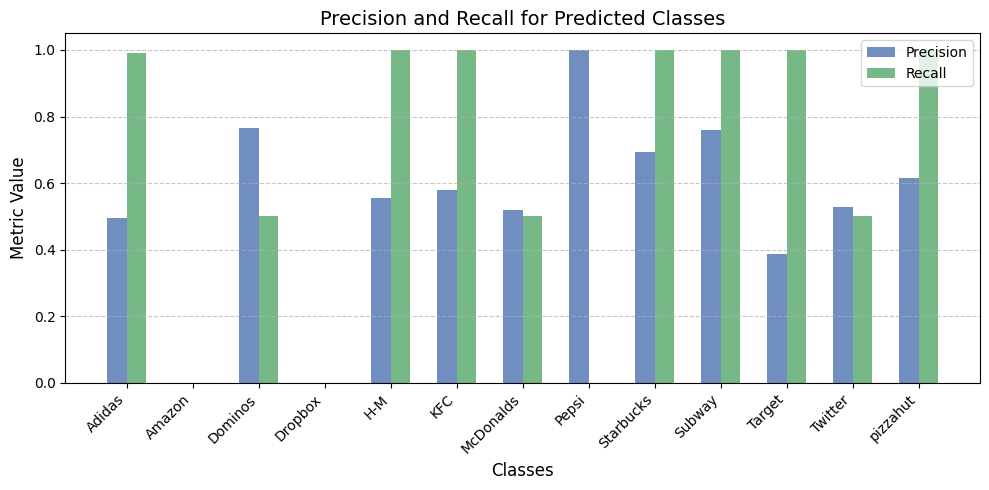

In [ ]:
precision = np.array(metrics.box.p.tolist()) if isinstance(metrics.box.p, np.ndarray) else np.array([])
recall = np.array(metrics.box.r.tolist()) if isinstance(metrics.box.r, np.ndarray) else np.array([])

# Debugging prints
print("Precision shape:", precision)
print("Recall shape:", recall)

# Indices of predicted classes
predicted_indices = metrics.ap_class_index.tolist()  
print("Predicted class indices:", predicted_indices)


# Extract class names
class_names = list(metrics.names.values())  # Full class list
print(class_names)

filtered_class_names = [class_names[i] for i in predicted_indices]
print("classes:",filtered_class_names)
#filtered_precision = [precision[i] for i in predicted_indices]
#filtered_recall = [recall[i] for i in predicted_indices]

# Define x-axis indices
x = np.arange(len(filtered_class_names))
width = 0.3  

# Create figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot bars
ax.bar(x - width/2, precision, width, label='Precision', color='b', alpha=0.8)
ax.bar(x + width/2, recall, width, label='Recall', color='g', alpha=0.8)

# Labels and title
ax.set_xlabel("Classes", fontsize=12)
ax.set_ylabel("Metric Value", fontsize=12)
ax.set_title("Precision and Recall for Predicted Classes", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(filtered_class_names, rotation=45, ha="right")

# Add grid and legend
ax.grid(axis="y", linestyle="--", alpha=0.7)
ax.legend()

# Show plot
plt.tight_layout()
plt.show()

In [97]:
model1.export(format="tflite")

Ultralytics 8.3.75  Python-3.11.11 torch-2.5.1+cu121 CPU (13th Gen Intel Core(TM) i7-13700HX)

PyTorch: starting from 'runs\detect\train9\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 61, 8400) (6.0 MB)

TensorFlow SavedModel: starting export with tensorflow 2.18.0...


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.48...
ONNX: export success  0.9s, saved as 'runs\detect\train9\weights\best.onnx' (11.8 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.26.3...
TensorFlow SavedModel: export success  22.0s, saved as 'runs\detect\train9\weights\best_saved_model' (30.2 MB)

TensorFlow Lite: starting export with tensorflow 2.18.0...
TensorFlow Lite: export success  0.0s, saved as 'runs\detect\train9\weights\best_saved_model\best_float32.tflite' (11.8 MB)

Export complete (22.3s)
Results saved to C:\Users\Divay Nagpal\Documents\NorthwesternMaterial\MS462\Final Project\YoloTraining\runs\detect\train9\weights


'runs\\detect\\train9\\weights\\best_saved_model\\best_float32.tflite'

Overall Model Performance (All Classes)

Precision (P)	0.531 (53.1%)	About half of the predicted bounding boxes are correct, indicating a high false positive rate.

Recall (R)	0.653 (65.3%)	The model is detecting about 65% of actual objects, meaning some objects are missed.

mAP@50	0.701 (70.1%)	The model detects objects with decent localization accuracy at 50% IoU.

mAP@50-95	0.516 (51.6%)	Strict localization requirements lower the performance, suggesting potential issues with bounding box accuracy.


Strong Performance
Starbucks (P: 0.693, R: 1.0, mAP@50: 99.5%, mAP@50-95: 82.1%)
S
tarbucks is detected perfectly, with high confidence and accurate localization.

H&M (P: 0.554, R: 1.0, mAP@50: 99.5%, mAP@50-95: 89.5%)

Very high recall and excellent localization.

KFC (P: 0.58, R: 1.0, mAP@50: 99.5%, mAP@50-95: 89.5%)

Model is highly confident in detecting KFC instances.


Poor Performance / Missing Detections

Amazon (P: 0.0, R: 0.0, mAP@50: 0.0, mAP@50-95: 0.0)

Complete failure—model could not detect any Amazon instances.

Dropbox (P: 0.0, R: 0.0, mAP@50: 0.0, mAP@50-95: 0.0)

Same issue—Dropbox was not detected at all.


Brands (Starbucks, H&M, KFC) are detected well, likely because their logos or branding are distinctive and well-represented in training data.

Classes like Amazon and Dropbox are not detected at all, possibly due to high similarity to background or other classes, making it harder for the model to distinguish them.

The model is highly accurate for Starbucks, H&M, and KFC, meaning it has successfully learned their features.

Missing Classes like Amazon, Dropbox etc. need more input images

Data Augemntation

This dataset is more challenging than the previous one because it has 57 classes vs. 2 in the first dataset and some brands have very low representation in the training data. There is again data imbalance in this case.

In [ ]:
# Iteration 3 - Train the yolo model on Nike and starbucks dataset using transfer learning


In [ ]:
model2 = YOLO("yolov8n.pt")
for param in model2.model.parameters():
    param.requires_grad = False
for param in model2.model.model[-1].parameters():  
    param.requires_grad = True  

import torch
import torch.nn as nn


new_layers = nn.Sequential(
    nn.Linear(1280, 512), 
    nn.ReLU(),
    nn.Linear(512, 2)
)

# Replace YOLO's classification head
model2.model.head = new_layers

# Train only the new layers
optimizer = torch.optim.Adam(model2.model.head.parameters(), lr=0.001)

# Train on custom dataset
model2.train(data="C:/Users/Divay Nagpal/Documents/NorthwesternMaterial/MS462/Final Project/YoloTraining/data.yaml", epochs=50, batch=16, imgsz=640, optimizer="Adam", device=0, lr0=0.001)

for name, param in model2.model .named_parameters():
    print(f"{name}: {'Trainable' if param.requires_grad else 'Frozen'}")

New https://pypi.org/project/ultralytics/8.3.90 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.75  Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=C:/Users/Divay Nagpal/Documents/NorthwesternMaterial/MS462/Final Project/YoloTraining/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train11, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False,

train: Scanning C:\Users\Divay Nagpal\Documents\NorthwesternMaterial\MS462\Final Project\Dataset\train\labels.cache... 5728 images, 3 backgrounds, 1 corrupt: 100%|██████████| 5728/5728 [00:00<?, ?it/s]

train: WARNING  C:\Users\Divay Nagpal\Documents\NorthwesternMaterial\MS462\Final Project\Dataset\train\images\Starbucks.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     775.65      770.71      1520.7        1525]



val: Scanning C:\Users\Divay Nagpal\Documents\NorthwesternMaterial\MS462\Final Project\Dataset\valid\labels.cache... 250 images, 0 backgrounds, 1 corrupt: 100%|██████████| 250/250 [00:00<?, ?it/s]

val: WARNING  C:\Users\Divay Nagpal\Documents\NorthwesternMaterial\MS462\Final Project\Dataset\valid\images\Starbucks.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     775.65      770.71      1520.7        1525]


Plotting labels to runs\detect\train11\labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train11
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50       2.1G      1.324      1.499       1.05         45        640: 100%|██████████| 358/358 [01:54<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.70it/s]

                   all        249        521       0.11      0.804      0.536      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.15G       1.28      1.084      1.023         58        640: 100%|██████████| 358/358 [03:07<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.46it/s]

                   all        249        521      0.721       0.15      0.127     0.0661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.09G      1.246     0.9959      1.014         49        640: 100%|██████████| 358/358 [00:51<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.17it/s]

                   all        249        521       0.45      0.668      0.709      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.13G      1.216     0.9398     0.9986         32        640: 100%|██████████| 358/358 [00:52<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.08it/s]

                   all        249        521      0.581      0.309      0.736      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.15G      1.182      0.898     0.9854         50        640: 100%|██████████| 358/358 [00:55<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.22it/s]

                   all        249        521      0.807      0.713      0.741      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.12G      1.166     0.8842     0.9854         40        640: 100%|██████████| 358/358 [00:54<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.09it/s]

                   all        249        521      0.825      0.639      0.754        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.12G      1.139     0.8376     0.9707         45        640: 100%|██████████| 358/358 [00:54<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.26it/s]

                   all        249        521      0.811      0.717       0.76       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.13G      1.121     0.8184     0.9632         47        640: 100%|██████████| 358/358 [00:53<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.75it/s]

                   all        249        521      0.803      0.736      0.756      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.12G      1.101     0.7974     0.9631         51        640: 100%|██████████| 358/358 [00:53<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.56it/s]

                   all        249        521      0.781      0.701      0.736      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       2.1G      1.083     0.7747     0.9517         62        640: 100%|██████████| 358/358 [00:52<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.13it/s]

                   all        249        521      0.833       0.73       0.78      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.13G       1.08       0.77     0.9549         44        640: 100%|██████████| 358/358 [00:49<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.61it/s]

                   all        249        521      0.816      0.734      0.773      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.13G      1.077     0.7585     0.9515         36        640: 100%|██████████| 358/358 [00:49<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.58it/s]

                   all        249        521       0.85      0.728      0.774      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.14G      1.059     0.7437     0.9431         70        640: 100%|██████████| 358/358 [00:49<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.47it/s]

                   all        249        521      0.786      0.671      0.783      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.13G      1.057     0.7422     0.9512         41        640: 100%|██████████| 358/358 [00:55<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.11it/s]

                   all        249        521      0.838       0.74      0.789      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.15G      1.039     0.7227     0.9439         38        640: 100%|██████████| 358/358 [00:52<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.67it/s]

                   all        249        521      0.828      0.759      0.795      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.14G      1.041     0.7178     0.9358         36        640: 100%|██████████| 358/358 [01:02<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.41it/s]

                   all        249        521      0.825      0.756      0.794      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.15G      1.026     0.7064     0.9347         51        640: 100%|██████████| 358/358 [00:53<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.46it/s]

                   all        249        521      0.855      0.725      0.797       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.15G      1.022     0.7017     0.9409         45        640: 100%|██████████| 358/358 [00:54<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.64it/s]

                   all        249        521      0.825      0.752      0.803       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.13G      1.015     0.6981     0.9343         35        640: 100%|██████████| 358/358 [00:50<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.32it/s]

                   all        249        521      0.878      0.743      0.809      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.15G      1.001     0.6818     0.9316         34        640: 100%|██████████| 358/358 [00:50<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.47it/s]

                   all        249        521      0.851      0.747      0.799      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.15G      1.014     0.6809     0.9318         63        640: 100%|██████████| 358/358 [00:56<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.33it/s]

                   all        249        521      0.859      0.758      0.812      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.13G     0.9809     0.6641     0.9238         36        640: 100%|██████████| 358/358 [00:59<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.25it/s]

                   all        249        521      0.861      0.758      0.813      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.15G     0.9821     0.6579     0.9231         35        640: 100%|██████████| 358/358 [00:53<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.49it/s]

                   all        249        521      0.884      0.761      0.819       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50       2.1G     0.9804     0.6606     0.9241         58        640: 100%|██████████| 358/358 [00:59<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.70it/s]

                   all        249        521      0.863      0.766      0.816      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.12G     0.9636     0.6489     0.9223         53        640: 100%|██████████| 358/358 [00:49<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.58it/s]

                   all        249        521       0.84      0.775      0.818      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.15G     0.9593     0.6241     0.9203         53        640: 100%|██████████| 358/358 [00:49<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.74it/s]

                   all        249        521      0.862      0.765      0.821      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.08G      0.958      0.631     0.9198         58        640: 100%|██████████| 358/358 [00:49<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.48it/s]

                   all        249        521      0.863      0.771      0.829      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.16G     0.9497     0.6169     0.9131         40        640: 100%|██████████| 358/358 [00:49<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.74it/s]

                   all        249        521      0.849      0.786      0.827      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.12G     0.9465     0.6221     0.9132         42        640: 100%|██████████| 358/358 [00:49<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.43it/s]

                   all        249        521      0.865      0.766      0.822      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.15G     0.9411     0.6087     0.9125         39        640: 100%|██████████| 358/358 [00:51<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.34it/s]

                   all        249        521      0.878      0.765      0.827      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.17G      0.954     0.6182     0.9127         57        640: 100%|██████████| 358/358 [00:49<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.22it/s]

                   all        249        521      0.871      0.781      0.831      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       2.1G     0.9172      0.588     0.9081         34        640: 100%|██████████| 358/358 [00:50<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.24it/s]

                   all        249        521      0.874      0.778       0.83      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.19G      0.923     0.5923     0.9109         69        640: 100%|██████████| 358/358 [00:50<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.13it/s]

                   all        249        521      0.871      0.771      0.823      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.12G     0.9098     0.5788     0.9052         47        640: 100%|██████████| 358/358 [01:05<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.15it/s]

                   all        249        521      0.872      0.789      0.835      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.15G     0.9101     0.5797     0.9053         48        640: 100%|██████████| 358/358 [01:05<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.46it/s]

                   all        249        521      0.883      0.783      0.833      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.15G     0.9187     0.5757     0.9039         61        640: 100%|██████████| 358/358 [01:04<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.88it/s]

                   all        249        521      0.871       0.78      0.831      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.16G     0.8998     0.5618     0.8973         64        640: 100%|██████████| 358/358 [00:52<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.27it/s]

                   all        249        521      0.842      0.794      0.833      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.07G     0.8811     0.5493     0.8945         53        640: 100%|██████████| 358/358 [01:01<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.63it/s]

                   all        249        521      0.893      0.773      0.836      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.12G     0.8887     0.5557     0.8958         50        640: 100%|██████████| 358/358 [00:56<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.68it/s]

                   all        249        521      0.874       0.79      0.836      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.15G     0.8736     0.5502     0.8955         32        640: 100%|██████████| 358/358 [00:50<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.50it/s]

                   all        249        521      0.863      0.797      0.838       0.69


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50       2.1G     0.8729     0.5379     0.8804         23        640: 100%|██████████| 358/358 [00:50<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.59it/s]

                   all        249        521      0.867      0.786      0.835      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.12G       0.86     0.5186     0.8735         26        640: 100%|██████████| 358/358 [00:59<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.14it/s]

                   all        249        521      0.856      0.794      0.836      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.12G     0.8523     0.5015     0.8756         23        640: 100%|██████████| 358/358 [00:56<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.27it/s]

                   all        249        521      0.862      0.796      0.837      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.11G     0.8497     0.5016     0.8687         29        640: 100%|██████████| 358/358 [00:53<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.51it/s]

                   all        249        521      0.886      0.785      0.843      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.11G     0.8459      0.495     0.8676         27        640: 100%|██████████| 358/358 [00:49<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.85it/s]

                   all        249        521      0.885      0.797      0.844      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.12G     0.8328     0.4863      0.866         21        640: 100%|██████████| 358/358 [00:49<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.73it/s]

                   all        249        521      0.884      0.797      0.844      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.12G     0.8301     0.4761     0.8664         33        640: 100%|██████████| 358/358 [00:49<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.74it/s]

                   all        249        521      0.902      0.821      0.849      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.12G     0.8157     0.4718     0.8642         26        640: 100%|██████████| 358/358 [00:48<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.62it/s]

                   all        249        521      0.885      0.793      0.842      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.11G     0.8177     0.4671      0.862         33        640: 100%|██████████| 358/358 [00:49<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.83it/s]

                   all        249        521      0.902       0.81      0.843      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.11G     0.8101     0.4635     0.8596         27        640: 100%|██████████| 358/358 [00:48<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.69it/s]

                   all        249        521      0.909      0.806      0.845      0.693



50 epochs completed in 0.836 hours.
Optimizer stripped from runs\detect\train11\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train11\weights\best.pt, 6.2MB

Validating runs\detect\train11\weights\best.pt...
Ultralytics 8.3.75  Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.74it/s]


                   all        249        521      0.862      0.796      0.837      0.699
                  NIKE        244        516      0.824      0.591      0.678       0.43
             Starbucks          5          5      0.899          1      0.995      0.969
Speed: 0.4ms preprocess, 1.7ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs\detect\train11
model.0.conv.weight: Frozen
model.0.bn.weight: Frozen
model.0.bn.bias: Frozen
model.1.conv.weight: Frozen
model.1.bn.weight: Frozen
model.1.bn.bias: Frozen
model.2.cv1.conv.weight: Frozen
model.2.cv1.bn.weight: Frozen
model.2.cv1.bn.bias: Frozen
model.2.cv2.conv.weight: Frozen
model.2.cv2.bn.weight: Frozen
model.2.cv2.bn.bias: Frozen
model.2.m.0.cv1.conv.weight: Frozen
model.2.m.0.cv1.bn.weight: Frozen
model.2.m.0.cv1.bn.bias: Frozen
model.2.m.0.cv2.conv.weight: Frozen
model.2.m.0.cv2.bn.weight: Frozen
model.2.m.0.cv2.bn.bias: Frozen
model.3.conv.weight: Frozen
model.3.bn.weight: Frozen
model.3.bn.bias: Fro

In [35]:
#model2.export(format="tflite", dynamic=False, int8=False, simplify=True)
model2.export(format="tflite")


Ultralytics 8.3.75  Python-3.11.11 torch-2.5.1+cu121 CPU (13th Gen Intel Core(TM) i7-13700HX)

PyTorch: starting from 'runs\detect\train11\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (5.9 MB)

TensorFlow SavedModel: starting export with tensorflow 2.18.0...

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.48...
ONNX: export success  1.5s, saved as 'runs\detect\train11\weights\best.onnx' (11.8 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.26.3...
TensorFlow SavedModel: export success  37.7s, saved as 'runs\detect\train11\weights\best_saved_model' (30.1 MB)

TensorFlow Lite: starting export with tensorflow 2.18.0...
TensorFlow Lite: export success  0.0s, saved as 'runs\detect\train11\weights\best_saved_model\best_float32.tflite' (11.7 MB)

Export complete (38.4s)
Results saved to C:\Users\Divay Nagpal\Documents\NorthwesternMaterial\MS462\Final Project\YoloTraining\runs\detect\train11\weigh

'runs\\detect\\train11\\weights\\best_saved_model\\best_float32.tflite'

In [ ]:

# Load the TFLite model
interpreter = tflite.Interpreter(model_path="C:/Users/Divay Nagpal/Documents/NorthwesternMaterial/MS462/Final Project/YoloTraining/runs/detect/train11/weights/best_saved_model/best_float32.tflite")

# Allocate tensors
interpreter.allocate_tensors()

# Get output tensor details
output_details = interpreter.get_output_details()

# Print output shapes
for i, output in enumerate(output_details):
    print(f"Output {i} shape: {output['shape']}")

Output 0 shape: [   1    6 8400]


In [16]:
model = torch.load("C:/Users/Divay Nagpal/Documents/NorthwesternMaterial/MS462/Final Project/YoloTraining/runs/detect/train11/weights/best.pt")

In [28]:
model = YOLO("C:/Users/Divay Nagpal/Documents/NorthwesternMaterial/MS462/Final Project/YoloTraining/runs/detect/train11/weights/best.pt")

# Get the number of classes
num_classes = model.model.nc
class_names = model.model.names  # Dictionary mapping index → class name

print("Number of classes detected in the model:", num_classes)
print("Class names:", class_names)

Number of classes detected in the model: 2
Class names: {0: 'NIKE', 1: 'Starbucks'}


In [29]:
model.export(format="tflite")

Ultralytics 8.3.75  Python-3.11.11 torch-2.5.1+cu121 CPU (13th Gen Intel Core(TM) i7-13700HX)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'C:\Users\Divay Nagpal\Documents\NorthwesternMaterial\MS462\Final Project\YoloTraining\runs\detect\train11\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (5.9 MB)

TensorFlow SavedModel: starting export with tensorflow 2.18.0...

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.48...
ONNX: export success  1.1s, saved as 'C:\Users\Divay Nagpal\Documents\NorthwesternMaterial\MS462\Final Project\YoloTraining\runs\detect\train11\weights\best.onnx' (11.8 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.26.3...
TensorFlow SavedModel: export success  18.4s, saved as 'C:\Users\Divay Nagpal\Documents\NorthwesternMaterial\MS462\Final Project\YoloTraining\runs\detect\train11\weights\best_saved_model' (30.1 MB)

'C:\\Users\\Divay Nagpal\\Documents\\NorthwesternMaterial\\MS462\\Final Project\\YoloTraining\\runs\\detect\\train11\\weights\\best_saved_model\\best_float32.tflite'


image 1/1 C:\Users\Divay Nagpal\Documents\NorthwesternMaterial\MS462\Final Project\FinalSubmission\KakaoTalk_20240404_104751305_29_jpg.rf.99f1fdbc0d0d656d1236332a55f3b276.jpg: 640x640 1 Starbucks, 61.0ms
Speed: 4.4ms preprocess, 61.0ms inference, 7.4ms postprocess per image at shape (1, 3, 640, 640)
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'NIKE', 1: 'Starbucks'}
obb: None
orig_img: array([[[195, 197, 197],
        [195, 197, 197],
        [195, 197, 197],
        ...,
        [200, 202, 202],
        [200, 202, 202],
        [200, 202, 202]],

       [[195, 197, 197],
        [195, 197, 197],
        [195, 197, 197],
        ...,
        [199, 201, 201],
        [199, 201, 201],
        [199, 201, 201]],

       [[195, 197, 197],
        [195, 197, 197],
        [195, 197, 197],
        ...,
        [198, 200, 200],
        [198, 200, 200],
        [198, 200, 200]],

       ...,


val: Scanning C:\Users\Divay Nagpal\Documents\NorthwesternMaterial\MS462\Final Project\Dataset\test\labels.cache... 19 images, 0 backgrounds, 1 corrupt: 100%|██████████| 19/19 [00:00<?, ?it/s]

val: WARNING  C:\Users\Divay Nagpal\Documents\NorthwesternMaterial\MS462\Final Project\Dataset\test\images\Starbucks.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     775.65      770.71      1520.7        1525]



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.95s/it]


                   all         18         25      0.761      0.789       0.78      0.608
                  NIKE         12         19      0.629      0.579      0.564      0.326
             Starbucks          6          6      0.894          1      0.995      0.891
Speed: 7.6ms preprocess, 18.6ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to runs\detect\val13
Precision shape: [    0.62908     0.89358]
Recall shape: [    0.57895           1]
Predicted class indices: [0, 1]
['NIKE', 'Starbucks']
classes: ['NIKE', 'Starbucks']


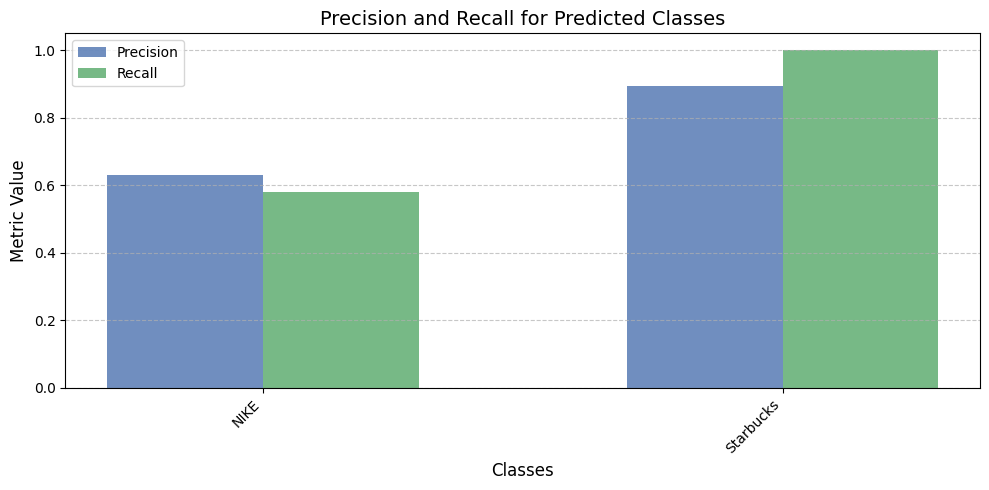

In [16]:
#Model Evaluation
model = YOLO("C:/Users/Divay Nagpal/Documents/NorthwesternMaterial/MS462/Final Project/YoloTraining/runs/detect/train11/weights/best.pt")

# Load an image for prediction
image_path = "C:/Users/Divay Nagpal/Documents/NorthwesternMaterial/MS462/Final Project/FinalSubmission/KakaoTalk_20240404_104751305_29_jpg.rf.99f1fdbc0d0d656d1236332a55f3b276.jpg"

# Perform inference
results = model.predict(image_path, conf=0.25)  # Set confidence threshold
print(results)
# Display the results
for result in results:
    boxes = result.boxes.xyxy  # Bounding box coordinates
    scores = result.boxes.conf.tolist()  # Confidence scores
    classes = result.boxes.cls.tolist()  # Class labels
    
    # Print detected objects
    for cls, conf, box in zip(classes, scores, boxes):
        print(f"Detected Class: {int(cls)}, Confidence: {conf}, Bounding Box: {box.tolist()}")

    # Show image with detections
    result.show()  

# Validate the model on the test set
metrics = model.val(data="C:/Users/Divay Nagpal/Documents/NorthwesternMaterial/MS462/Final Project/YoloTraining/data.yaml", split="test", augment=False)


precision = np.array(metrics.box.p.tolist()) if isinstance(metrics.box.p, np.ndarray) else np.array([])
recall = np.array(metrics.box.r.tolist()) if isinstance(metrics.box.r, np.ndarray) else np.array([])

# Debugging prints
print("Precision shape:", precision)
print("Recall shape:", recall)

# Indices of predicted classes
predicted_indices = metrics.ap_class_index.tolist()  
print("Predicted class indices:", predicted_indices)


# Extract class names
class_names = list(metrics.names.values())  # Full class list
print(class_names)

filtered_class_names = [class_names[i] for i in predicted_indices]
print("classes:",filtered_class_names)
#filtered_precision = [precision[i] for i in predicted_indices]
#filtered_recall = [recall[i] for i in predicted_indices]

# Define x-axis indices
x = np.arange(len(filtered_class_names))
width = 0.3  

# Create figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot bars
ax.bar(x - width/2, precision, width, label='Precision', color='b', alpha=0.8)
ax.bar(x + width/2, recall, width, label='Recall', color='g', alpha=0.8)

# Labels and title
ax.set_xlabel("Classes", fontsize=12)
ax.set_ylabel("Metric Value", fontsize=12)
ax.set_title("Precision and Recall for Predicted Classes", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(filtered_class_names, rotation=45, ha="right")

# Add grid and legend
ax.grid(axis="y", linestyle="--", alpha=0.7)
ax.legend()

# Show plot
plt.tight_layout()
plt.show()

Overall Metrics (Precision, Recall, mAP) Dropped Slightly

The overall precision, recall, and mAP values decreased slightly after transfer learning.
However, the differences are small, meaning the model still performs well.

Performance per class

Nike precision dropped by 11.6% → Model now has more false positives for Nike.

Nike recall dropped by 3.8% → Model is missing more Nike instances.

Nike mAP@50 dropped by 6.7% → Bounding box accuracy for Nike is worse than before.

Nike mAP@50-95 slightly improved (+1.0%), indicating better high-IoU detections.

Overall the performance of the model dropped with transfer learning so i decided to use the GPU trained model on the full dataset with full trained layers.